## Assumptions

- **Time-dated items**: 
sale only for a certain amount of time.
- **perishable capacity with no salvage value**: 
products goes back and cannot be sold afterwards.
- **marketplace with no competing products(monopolistic situation)**: 
no competition.
- **absence of inventory replenishment**: 
no additional inventory.
- **infinite number of customers**: 
the customer population size does not enter the model.
- **customers are myopic**: 
customers buy as soon as the price is less than the one they are prepared to pay.

## Mathematical Setting

- **initial inventory**: $s_0=150$
- **total production cost**: $C_0=150$ dollars
- **demand occur time points**: $t \in (1,2,3,4, ..., 10)$
- **price at time t**: $p_t$
- **demand with price p at time t**: $x(p, t)$
- **price as a function of demand and time**: $p(x, t)$
- **assumption about x**: $x$ is continuously differentiable wrt $p$

## Task

Find the optimal price for each hour of the day in order to maximize our revenue. 

mathematical format:
- Maximize revenue: $\sum_{t=1}^{10}p_tx_t$ 

subject to contraints:
- Inventory limitation: $\sum_{t=1}^{10}x_t \le s_0$
- Positive demand: $x_t \ge 0 \, \forall t$

### Deterministic Model Formulation

where demand function $x(p_t, t)$ is known ahead of time.

Assume pricing curve as follows:

$p(x_t, t) = (A-Bx_t)\frac{D}{D+t}$

where $A, B$ and $D$ are parameters, or look at the problem from a demand perspective:

$x(p_t, t) = \frac{1}{B}(A-p_t\frac{D+t}{D})$

In principal, optimizing over depand or price are equivalent, but its more intuitive to optimize over price.

- demand goes down when price goes up.
- for fixed price, demand goes down with time.

Use values of $A=200,\, B=10,\, D=10$

In [9]:
## modules import
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import itertools as it
from seaborn import heatmap
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (12, 6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# price and demand functions
def price(x, a=200, b=10, d=10, t=np.linspace(1, 10, 10)):
    """
    return price given a demand x and time t
    """
    return (a-b*x)*(d/(d+x))

def demand(p, a=200, b=10, d=10, t=np.linspace(1, 10, 10)):
    """
    return depand given a price p and time t
    """
    return (1/b)*(a-p*((d+t)/d))

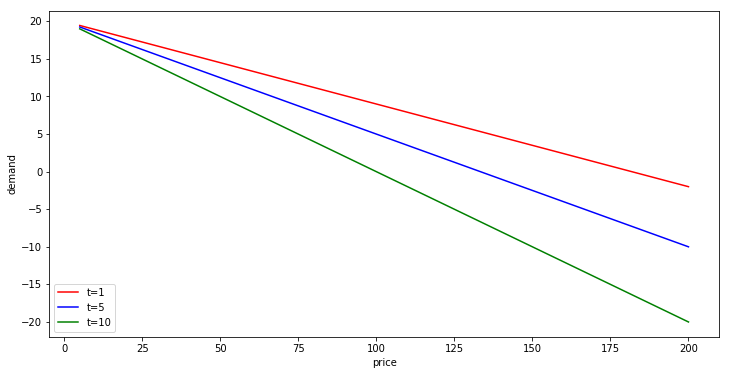

In [16]:
# explore different demand curves:
price_vals = np.array([5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 100.0, 200.0])
t_vals = np.array([1, 5, 10])
colors = ['red', 'blue', 'green']
for time, color in zip(t_vals, colors):
    plt.plot(price_vals, demand(price_vals, t=time), color=color, label='t={}'.format(time))
plt.legend(loc=3)
plt.xlabel('price')
plt.ylabel('demand')
plt.grid(False)
plt.show()

you can also look at a heatmap showing demand(unconstrained by inventory limits) for different values of $p$ and $t$ 

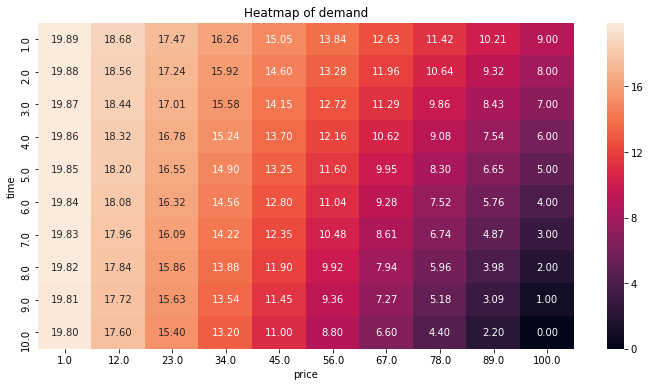

In [40]:
# look at a 2D revenue map:
t_vals = np.linspace(1, 10, 10)
p_vals = np.linspace(1, 100, 10)
tmp = list(it.product(t_vals, p_vals))
rev_df = pd.DataFrame(tmp, columns = ['time', 'price'])
rev_df['demand'] = rev_df.apply(lambda row: demand(row['price'], t=row['time']), axis=1)
rev_df['revenue'] = rev_df.apply(lambda row: row['price']*row['demand'], axis=1)
rev_df_demand = rev_df.pivot('time', 'price', values='demand')
heatmap(rev_df_demand, annot=True, fmt='.2f')
plt.title('Heatmap of demand')
plt.show()

Finally, an identical heatmap can be generated for revenue $(t * p)$ for different values of $p$ and $t$, uncontstrained by inventory limit.

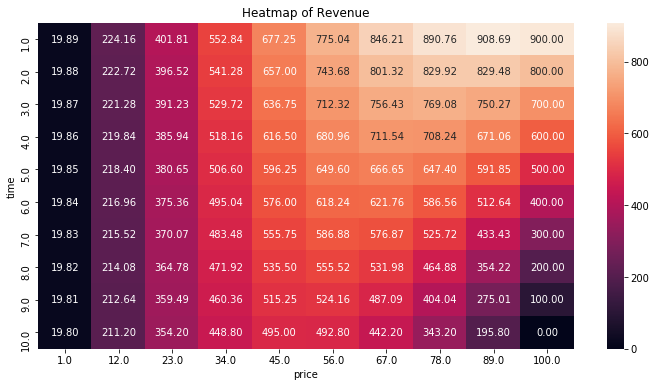

In [41]:
rev_df_revenue= rev_df.pivot('time', 'price', values= 'revenue')
heatmap(rev_df_revenue, annot=True, fmt='.2f')
plt.title('Heatmap of Revenue')
plt.show()

We see in the heatmap above that a good strategy to optimize revenue would be to start by having high prices at the beginning of the sale and slowly decreasing the price as time elapses. Now let's find the optimal solution!

## Finding the Optimal Vector: An optimization Example in Python

We will use the example above and adopt an initial inventory $s_0 = 150$ with model parameters. Start by writing the objective function.

In [42]:
# Let's define the objective function here.
def objective